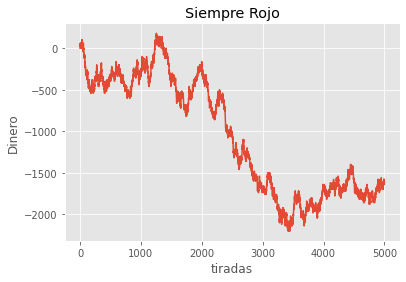

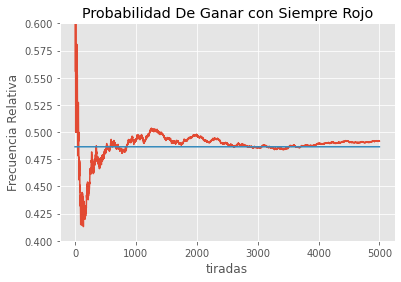

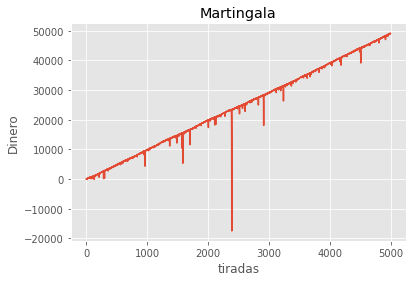

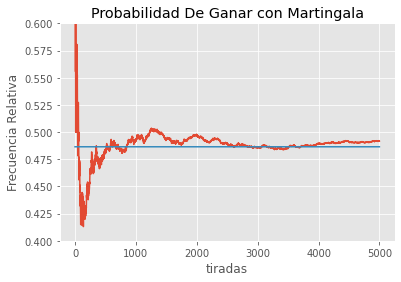

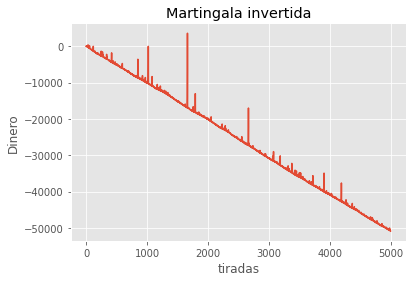

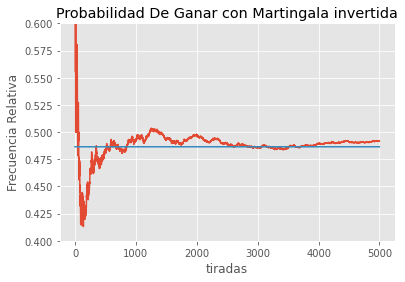

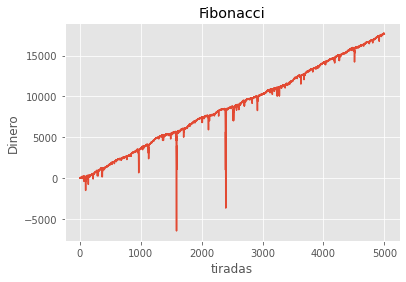

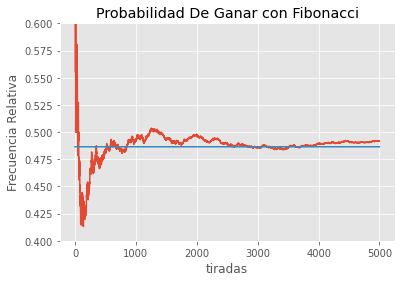

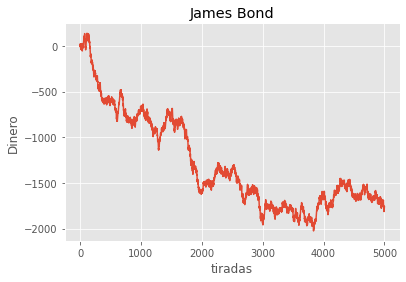

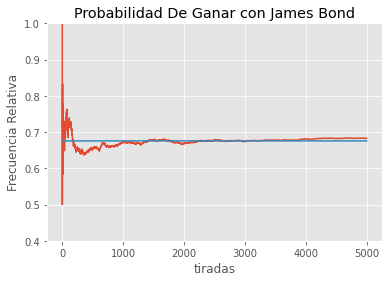

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


ruleta = {0: 'g', 1: 'r', 2: 'b', 3: 'r', 4: 'b', 5: 'r', 6: 'b', 7: 'r',
          8: 'b', 9: 'r', 10: 'b', 11: 'b', 12: 'r', 13: 'b', 14: 'r', 15: 'b', 16: 'r',
          17: 'b', 18: 'r', 19: 'r', 20: 'b', 21: 'r', 22: 'b', 23: 'r', 24: 'b', 25: 'r',
          26: 'b', 27: 'r', 28: 'b', 29: 'b', 30: 'r', 31: 'b', 32: 'r', 33: 'b', 34: 'r',
          35: 'b', 36: 'r'}


def girar_ruleta():
    numero = random.randint(0, 36)
    return numero


dinero = 0
tiradas = 5000
num = np.array([], dtype=int)
din_sr = np.array([dinero], dtype=int)
fre_abs_sr = 0
fre_rel_sr = []
din_mg = np.array([dinero], dtype=int)
win_r_mg = 0
fre_abs_mg = 0
fre_rel_mg = []
din_fb = np.array([dinero], dtype=int)
win_r_fb = 1
fre_abs_fb = 0
fre_rel_fb = []
din_jb = np.array([dinero], dtype=int)
fre_abs_jb = 0
fre_rel_jb = []
din_mgi = np.array([dinero], dtype=int)
win_r_mgi = 0
fre_abs_mgi = 0
fre_rel_mgi = []
num = np.array([], dtype=int)


def fib(n):
    if n < 2:
        return n
    else:
        return fib(n-1) + fib(n-2)


def siempre_rojo(color, apuesta, i):
    global fre_rel_sr
    global fre_abs_sr
    if color == 'r':
        fre_abs_sr = fre_abs_sr + 1
        fre_rel_sr.append(fre_abs_sr / (i+1))
        return apuesta
    else:
        fre_rel_sr.append(fre_abs_sr / (i+1))
        return -apuesta


def martingala(apuesta, color, n, i):
    global win_r_mg
    global fre_abs_mg
    global fre_rel_mg
    if color == ruleta.get(n):
        gano = apuesta * pow(2, win_r_mg)
        win_r_mg = 0
        fre_abs_mg = fre_abs_mg + 1
        fre_rel_mg.append(fre_abs_mg / (i+1))
        return gano
    else:
        perdio = -apuesta * pow(2, win_r_mg)
        win_r_mg = win_r_mg + 1
        fre_rel_mg.append(fre_abs_mg / (i+1))
        return perdio


def fibonacci(apuesta, color, n, i):
    global win_r_fb
    global fre_abs_fb
    global fre_rel_fb
    if color == ruleta.get(n):
        gano = apuesta * fib(win_r_fb)
        if win_r_fb >= 3:
            win_r_fb = win_r_fb - 2
        else:
            win_r_fb = 1
        fre_abs_fb = fre_abs_fb + 1
        fre_rel_fb.append(fre_abs_fb / (i+1))
        return gano
    else:
        perdio = -apuesta * fib(win_r_fb)
        win_r_fb = win_r_fb + 1
        fre_rel_fb.append(fre_abs_fb / (i+1))
        return perdio


def james_bond(n, apuesta, i):
    global fre_abs_jb
    global fre_rel_jb
    if n >= 19 and n <= 36:
        fre_abs_jb = fre_abs_jb + 1
        fre_rel_jb.append(fre_abs_jb / (i+1))
        return apuesta * 8
    elif n == 0:
        fre_abs_jb = fre_abs_jb + 1
        fre_rel_jb.append(fre_abs_jb / (i+1))
        return apuesta * 16
    elif n >= 13 and n <= 18:
        fre_abs_jb = fre_abs_jb + 1
        fre_rel_jb.append(fre_abs_jb / (i+1))
        return apuesta * 10
    else:
        fre_rel_jb.append(fre_abs_jb / (i+1))
        return (apuesta * -20)


def martingalainvertida(apuesta, color, n, i):
    global win_r_mgi
    global fre_abs_mgi
    global fre_rel_mgi
    if color == ruleta.get(n):
        gano = apuesta * pow(2, win_r_mgi)
        win_r_mgi = win_r_mgi + 1
        fre_abs_mgi = fre_abs_mgi + 1
        fre_rel_mgi.append(fre_abs_mgi / (i+1))
        return gano
    else:
        perdio = -apuesta * pow(2, win_r_mgi)
        win_r_mgi = 0
        fre_rel_mgi.append(fre_abs_mgi / (i+1))
        return perdio


for i in range(0, tiradas):
    n = girar_ruleta()
    num = np.append(num, [n])
    din_sr = np.append( din_sr, [din_sr[i] + siempre_rojo(ruleta.get(n), 20, i)])
    din_jb = np.append(din_jb, [din_jb[i] + james_bond(n, 1, i)])
    din_mg = np.append(din_mg, [din_mg[i] + martingala(20, 'r', n, i)])
    din_mgi = np.append(din_mgi, [din_mgi[i] + martingalainvertida(20, 'r', n, i)])
    din_fb = np.append(din_fb, [din_fb[i] + fibonacci(20, 'r', n, i)])


plt.style.use("ggplot")


plt.plot(range(len(din_sr)), din_sr)
plt.title("Siempre Rojo")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
plt.show()

y = fre_rel_sr
plt.plot(range(len(y)), y)
plt.plot(range(len(y)), [18/37] * len(y))
plt.title("Probabilidad De Ganar con Siempre Rojo")
plt.xlabel("tiradas")
plt.ylabel("Frecuencia Relativa")
plt.ylim(0.40, 0.60)
plt.show()

plt.plot(range(len(din_mg)), din_mg)
plt.title("Martingala")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
plt.show()

y = fre_rel_mg
plt.plot(range(len(y)), y)
plt.plot(range(len(y)), [18/37] * len(y))
plt.title("Probabilidad De Ganar con Martingala")
plt.xlabel("tiradas")
plt.ylabel("Frecuencia Relativa")
plt.ylim(0.40, 0.60)
plt.show()

plt.plot(range(len(din_mgi)), din_mgi)
plt.title("Martingala invertida")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
plt.show()

y = fre_rel_mgi
plt.plot(range(len(y)), y)
plt.title("Probabilidad De Ganar con Martingala invertida")
plt.plot(range(len(y)), [18/37] * len(y))
plt.xlabel("tiradas")
plt.ylabel("Frecuencia Relativa")
plt.ylim(0.40, 0.60)
plt.show()

plt.plot(range(len(din_fb)), din_fb)
plt.title("Fibonacci")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
plt.show()

y = fre_rel_fb
plt.plot(range(len(y)), y)
plt.title("Probabilidad De Ganar con Fibonacci")
plt.plot(range(len(y)), [18/37] * len(y))
plt.xlabel("tiradas")
plt.ylabel("Frecuencia Relativa")
plt.ylim(0.40, 0.60)
plt.show()

plt.plot(range(len(din_jb)), din_jb)
plt.title("James Bond")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
plt.show()

y = fre_rel_jb
plt.plot(range(len(y)), y)
plt.title("Probabilidad De Ganar con James Bond")
plt.plot(range(len(y)), [25/37] * len(y))
plt.xlabel("tiradas")
plt.ylabel("Frecuencia Relativa")
plt.ylim(0.40, 1)
plt.show()
